In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                          save_path=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        percents = cf/np.sum(cf, axis=1, keepdims=True)
        group_percentages = []
        for value in percents.flatten():
            if value == 0:
                group_percentages.append("0")
            else:
                group_percentages.append("{0:.2f}".format(value).strip("0"))
        # group_percentages = ["{0:.1%}".format(value) for value in percents.flatten()]
        # group_percentages = ["{0:.1%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    if save_path is not None:
        plt.savefig(save_path)

In [2]:
labels = {0: 'afraid',
    1: 'angry',
    2: 'annoyed',
    3: 'anticipating',
    4: 'anxious',
    5: 'apprehensive',
    6: 'ashamed',
    7: 'caring',
    8: 'confident',
    9: 'content',
    10: 'devastated',
    11: 'disappointed',
    12: 'disgusted',
    13: 'embarrassed',
    14: 'excited',
    15: 'faithful',
    16: 'furious',
    17: 'grateful',
    18: 'guilty',
    19: 'hopeful',
    20: 'impressed',
    21: 'jealous',
    22: 'joyful',
    23: 'lonely',
    24: 'nostalgic',
    25: 'prepared',
    26: 'proud',
    27: 'sad',
    28: 'sentimental',
    29: 'surprised',
    30: 'terrified',
    31: 'trusting',
    32: 'agreeing',
    33: 'acknowledging',
    34: 'encouraging',
    35: 'consoling',
    36: 'sympathizing',
    37: 'suggesting',
    38: 'questioning',
    39: 'Wishing',
    40: 'neutral'}
    
labels = [labels[i] for i in range(len(labels))]

In [3]:
import pandas as pd
from sklearn.metrics import confusion_matrix

### DMI-RoB

In [4]:
df = pd.read_csv("DMI-Error-Analysis - EIntent-DMIRob.tsv", delimiter="\t")
cfm = confusion_matrix(df["Gold_Label"], df["Predicted_Label"])

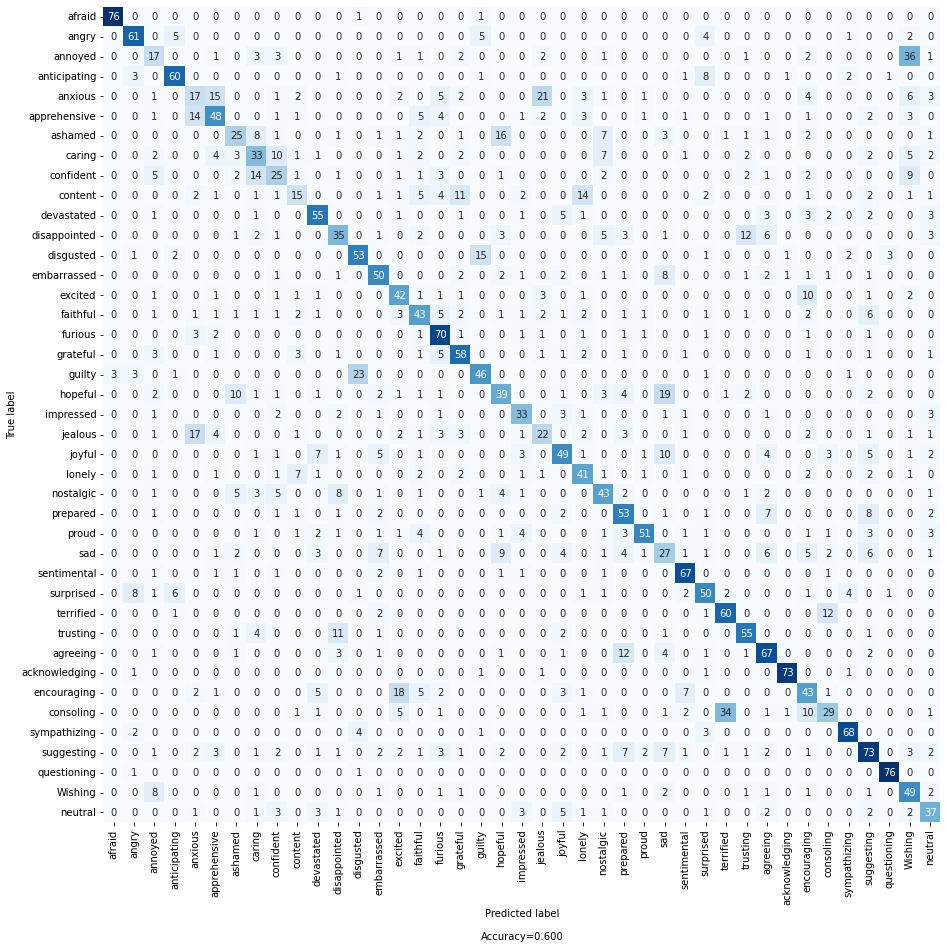

In [5]:
make_confusion_matrix(cfm, figsize=(15,15), cbar=False, categories=labels, percent=False)

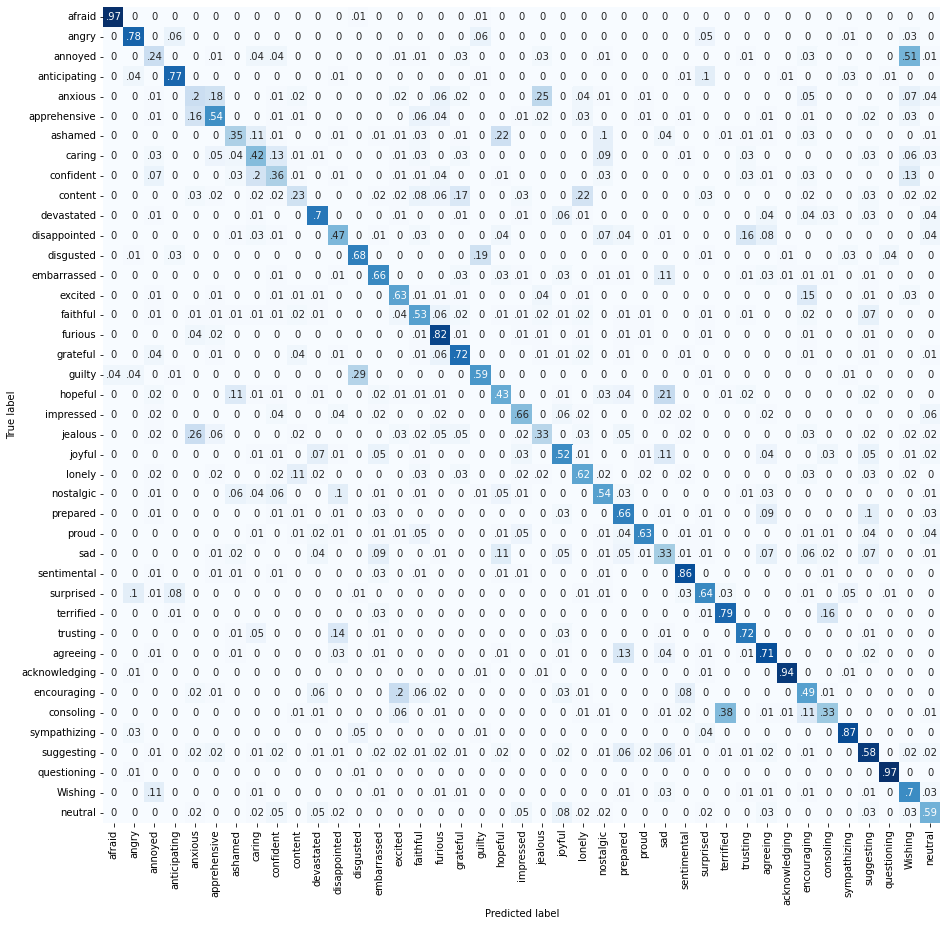

In [6]:
make_confusion_matrix(cfm, figsize=(15,15), cbar=False, categories=labels, percent=True, count=False, sum_stats=False, save_path="eintent-cm-dmirob.pdf")

### DialoGPT

In [7]:
df = pd.read_csv("DMI-Error-Analysis - EIntent-DialoGPT.tsv", delimiter="\t")
cfm = confusion_matrix(df["Gold_Label"], df["Predicted_Label"])

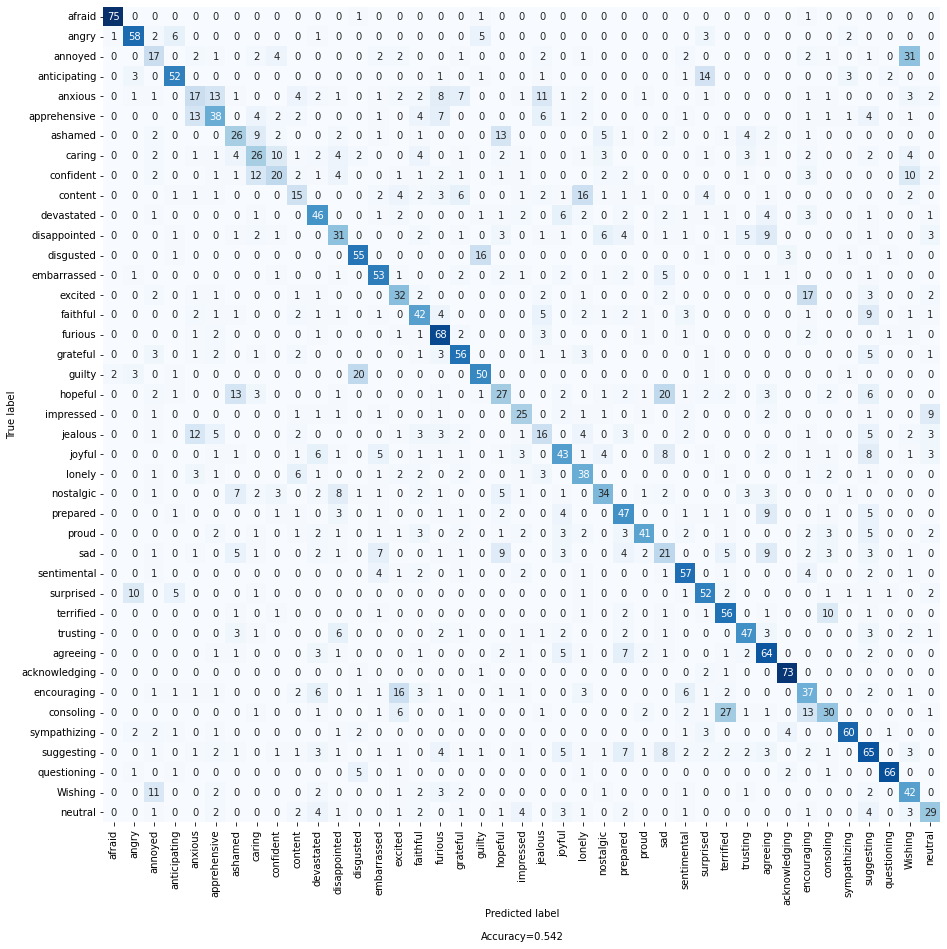

In [8]:
make_confusion_matrix(cfm, figsize=(15,15), cbar=False, categories=labels, percent=False)

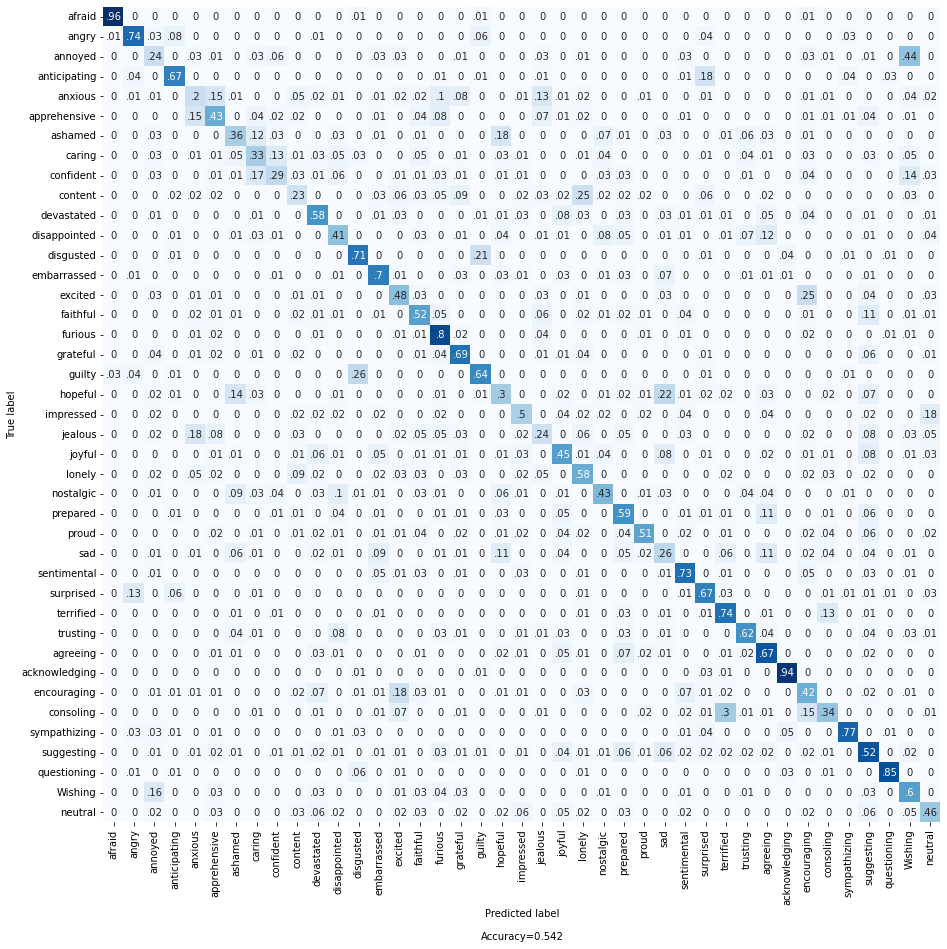

In [9]:
make_confusion_matrix(cfm, figsize=(15,15), cbar=False, categories=labels, percent=True, count=False)

### ConveRT

In [10]:
df = pd.read_csv("DMI-Error-Analysis - EIntent-convert.tsv", delimiter="\t")
cfm = confusion_matrix(df["Gold_Label"], df["Predicted_Label"])

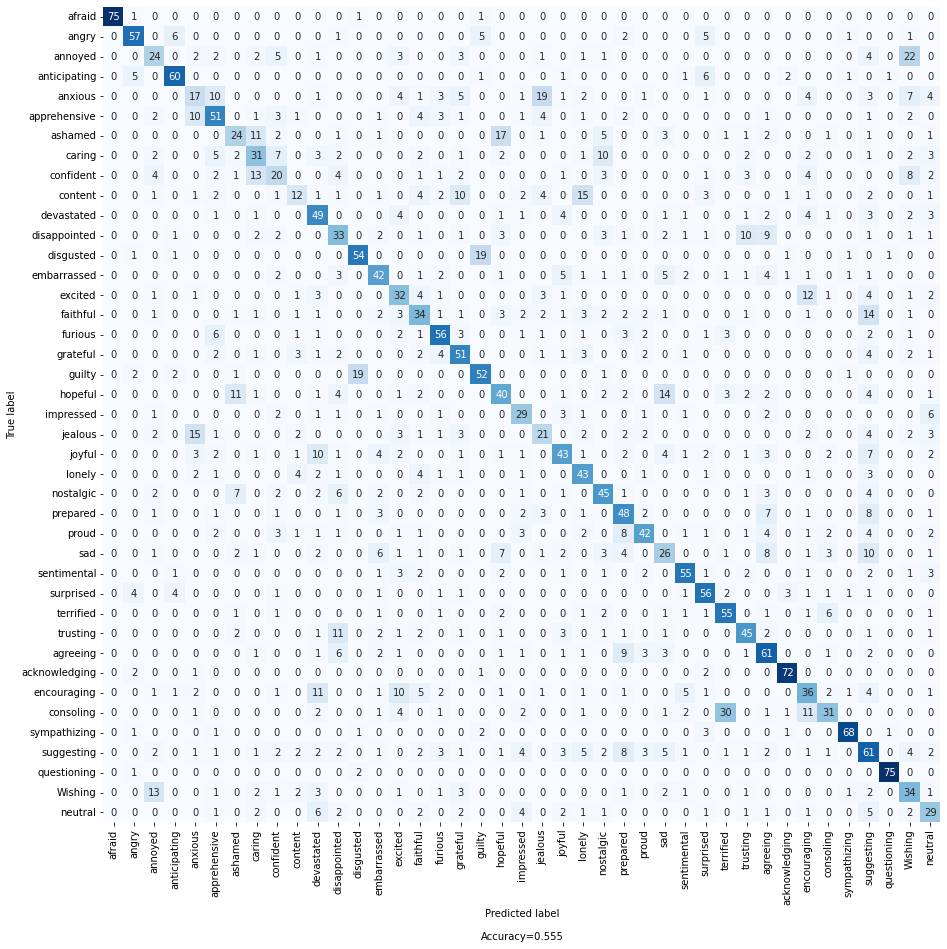

In [11]:
make_confusion_matrix(cfm, figsize=(15,15), cbar=False, categories=labels, percent=False)

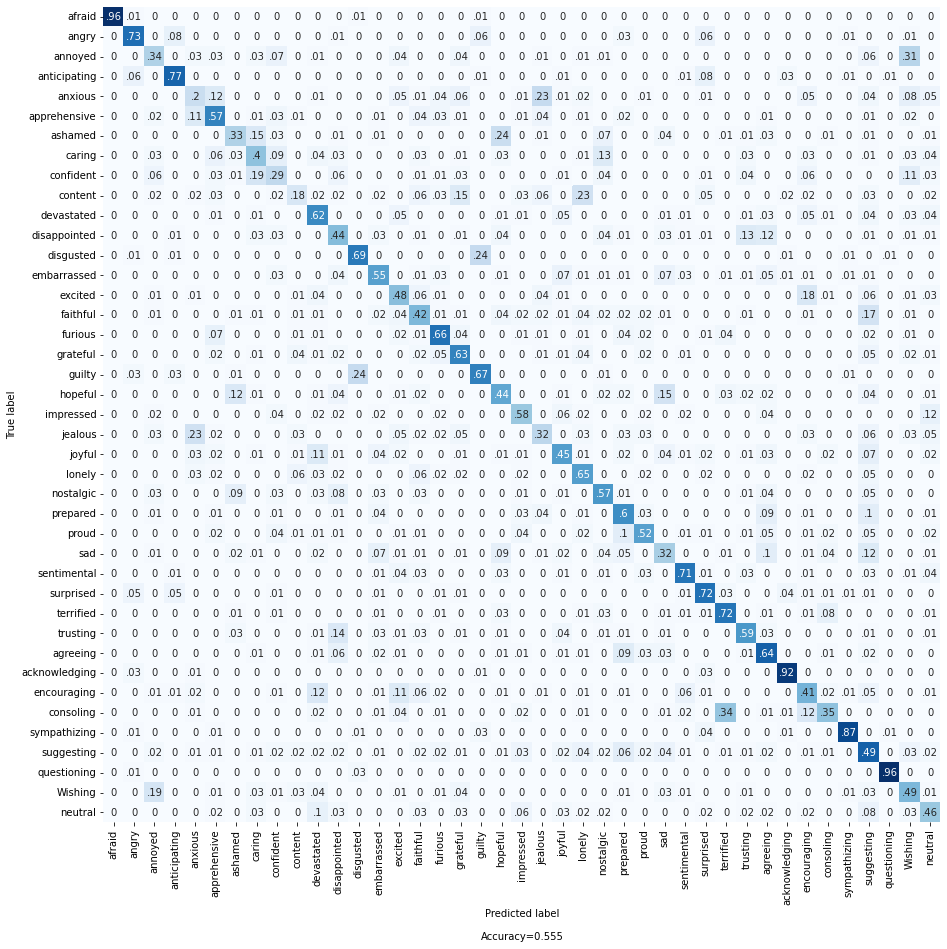

In [12]:
make_confusion_matrix(cfm, figsize=(15,15), cbar=False, categories=labels, percent=True, count=False)